#  Maven Halloween Challenge.

## Goal: To find the 3 treats you'll give out on Halloween to guarantee that trick-or-treaters of all tastes find something they'll love 

In [3]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
# read the candy data file
data = pd.read_csv("C:/Users/CJ(KoundinyaA)/Downloads/candy-data.csv")
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [11]:
data.keys()

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [21]:
#Lets look at those columns that has 1/0 as data
df = data.iloc[:,1:-3]
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


# Apply Principal Component Analysis
## PCA (Principal Component Analysis) is not a machine learning algorithm in the traditional sense (like classification or regression algorithms), but rather a dimensionality reduction technique. It falls under the category of unsupervised learning because it doesn't use labeled data (i.e., it doesn't predict or classify). Instead, PCA is used to reduce the number of variables in a dataset while retaining as much variability (information) as possible.

In [25]:
# import pca to reduce the 9 columns into 2 columns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [29]:
# the 2 columns account for ~60% of the variation in the data (add the two values in the array)
pca.explained_variance_ratio_

array([0.45736631, 0.15454393])

In [31]:
# view the columns
candy_2d = pd.DataFrame(pca.transform(df))
candy_2d.head()

,0,1
0,1.305021,-0.335978
1,1.123628,-0.294698
2,0.034733,-0.204088
3,0.034733,-0.204088
4,-0.469043,-0.565369


<Axes: xlabel='0', ylabel='1'>

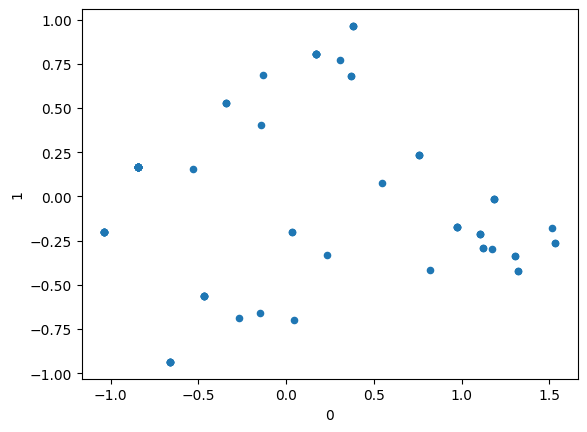

In [35]:
#Lets plot the two columns using scatter plot
candy_2d.plot(kind ="scatter",x = 0, y = 1)

In [39]:
#Lets add a bit of noise to the data because we see there is one point which is overlapping. 
#one dime and one quarter are identical in the below data. 
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [41]:
#If the data points are identical, points will overlap in a scatter plot, this makes it hard to distuinguish between different points. 
#Adding small noise shifts the points slightly making them more visible and spread out

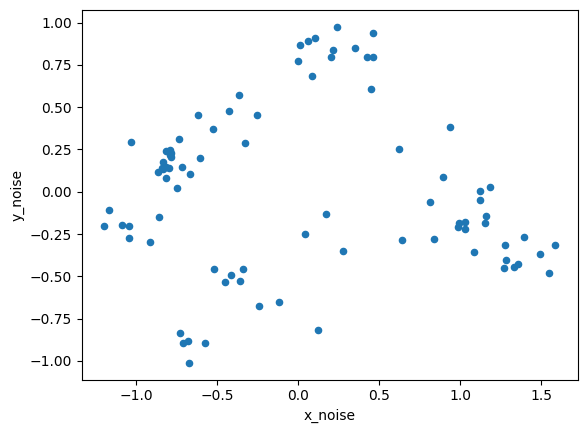

In [43]:
# add a bit of noise to the data and replot the data
#np.random.randn(85) * 0.1 generates random noise from a normal distribution with mean 0 and standard deviation 0.1. 
#The noise is scaled by 0.1 to keep the variations small, so the jitter doesn’t drastically change the data
import numpy as np

data['x_noise'] = candy_2d[0] + np.random.randn(85)*.1
data['y_noise'] = candy_2d[1] + np.random.randn(85)*.1
data.plot(kind='scatter', x='x_noise', y='y_noise');

In [45]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,x_noise,y_noise
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1.277811,-0.313004
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.084100,-0.354676
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.045380,-0.252238
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0.174143,-0.131380
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,-0.520555,-0.457081


In [49]:
#Feature selection (x_noise and y_noise in this case)
feature_noise = data[['x_noise','y_noise']]
feature_noise.head()

,x_noise,y_noise
0,1.277811,-0.313004
1,1.084100,-0.354676
2,0.045380,-0.252238
3,0.174143,-0.131380
4,-0.520555,-0.457081


In [ ]:
# export the data with the 2 new columns
data.to_csv('candy-data-pca.csv')